In [1]:
import pandas as pd
df=pd.read_csv('/content/emotions.csv')
df.head()
# Optional: sample a smaller dataset if memory issues persist
# df = df.sample(n=1000, random_state=42).reset_index(drop=True)

,text,label
0,i just feel really helpless and heavy hearted,4
1,ive enjoyed being able to slouch about relax a...,0
2,i gave up my internship with the dmrg and am f...,4
3,i dont know i feel so lost,0
4,i am a kindergarten teacher and i am thoroughl...,4


In [2]:
import string
from sklearn.feature_extraction.text import TfidfVectorizer

# Basic text preprocessing: lowercase and remove punctuation
def preprocess_text(text):
    text = text.lower()
    text = text.translate(str.maketrans("", "", string.punctuation))
    return text

# Apply preprocessing to the 'text' column
df['clean_text'] = df['text'].apply(preprocess_text)

# Vectorize using TF-IDF
tfidf = TfidfVectorizer(max_features=2000)
X = tfidf.fit_transform(df['clean_text'])

# Show shape of TF-IDF features
X.shape


(416809, 2000)

In [3]:
from sklearn.preprocessing import LabelEncoder

# Step 3: Encode Labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Display number of classes and a sample of encoded labels
num_classes = len(label_encoder.classes_)
print(f"Number of unique classes: {num_classes}")
print(f"First 10 encoded labels: {y[:10]}")


Number of unique classes: 6
First 10 encoded labels: [4 0 4 0 4 0 2 1 5 0]


In [4]:
from sklearn.model_selection import train_test_split

# Step 4: Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y  # stratify ensures balanced class distribution
)

# Print the shapes of the splits
print("Training set size:", X_train.shape)
print("Test set size:", X_test.shape)

import gc
gc.collect()

Training set size: (333447, 2000)
Test set size: (83362, 2000)


0

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Encode labels
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(df['label'])

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Show the shape of train and test splits
X_train.shape, X_test.shape, y_train.shape, y_test.shape

import gc
gc.collect()

0

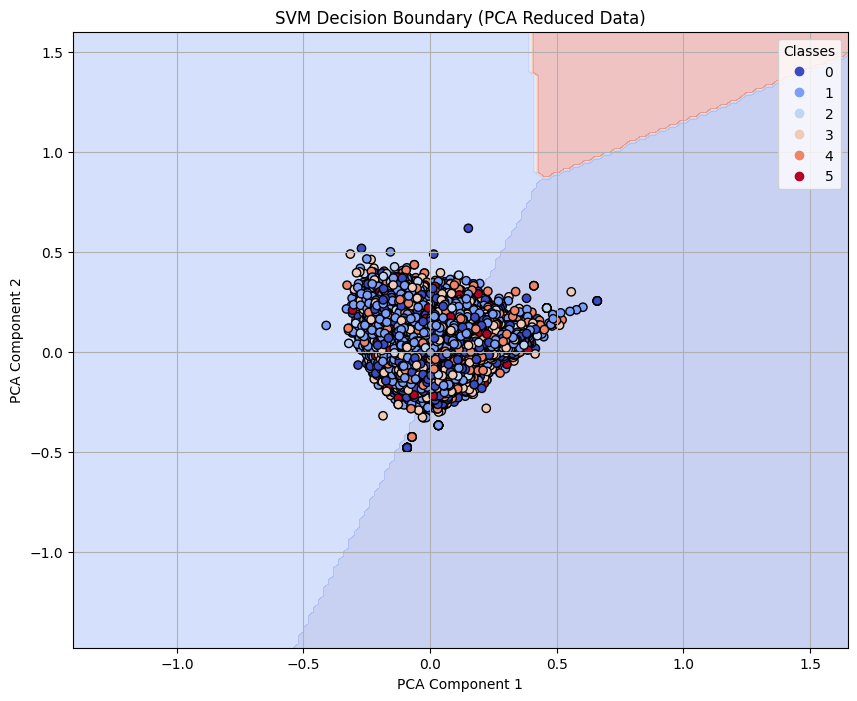

In [7]:
from sklearn.svm import LinearSVC

from sklearn.decomposition import PCA
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib.pyplot as plt

# Reduce dimensionality to 2D for visualization
pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train.toarray())
X_test_2D = pca.transform(X_test.toarray())

# Train SVM on reduced data
svm_vis = LinearSVC(dual=False, C=1.0)
svm_vis.fit(X_train_2D, y_train)

# Plot decision boundary
h = .02  # step size in the mesh
x_min, x_max = X_train_2D[:, 0].min() - 1, X_train_2D[:, 0].max() + 1
y_min, y_max = X_train_2D[:, 1].min() - 1, X_train_2D[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))
Z = svm_vis.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(10, 8))
plt.contourf(xx, yy, Z, cmap=plt.cm.coolwarm, alpha=0.3)
scatter = plt.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=y_train, cmap=plt.cm.coolwarm, edgecolors='k')
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.title("SVM Decision Boundary (PCA Reduced Data)")
plt.legend(*scatter.legend_elements(), title="Classes", loc="upper right")
plt.grid(True)
plt.show()
